## Explore the noble gas data collected on OSNAP 2016

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set_style("darkgrid")

In [28]:
# load in the IGF data

fname = '~/google_drive/data/greenland/cruise_data/2016/OSNAP/IGF_analysis/NLB3_Final.xlsx'


data = pd.read_excel( fname, sheet_name=0, header= [0,1] ) 

# Now let's drop the second level that contains the units
data.columns = data.columns.droplevel(1)

# lets replace the annoying parenthesis in the column headers
data.columns = data.columns.str.replace("[()]", "")

# drop bad rows
data.dropna(  subset=['stacast'], inplace=True)

data.tail()

station,stacast,bottle,pressure,temperature,salinity,duplicate,samplename,Del3He,CHe,CNe,...,ddHe,ddNe,ddAr,ddKr,ddXe,dCHe,dCNe,dCAr,dCKr,dCXe
280.0,1.0,1.0,87.499,3.5537,33.3949,0.0,CW20170419105603,-2.676,1.874581e-09,8.149616e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280.0,1.0,2.0,50.673,4.4908,32.9403,0.0,CW20170419105605,-2.841,1.875762e-09,8.131260e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280.0,1.0,2.0,50.673,4.4908,32.9403,0.0,CW20170419105605,-1.337,1.815789e-09,7.879061e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280.0,1.0,3.0,30.518,4.4910,32.5813,0.0,CW20170315104406,-2.039,1.874850e-09,8.143625e-09,...,0.384179,0.222562,0.327719,-0.215916,0.13394,6.900001e-12,1.755018e-11,5.108800e-08,8.135049e-12,7.524161e-13
280.0,1.0,3.0,30.518,4.4910,32.5813,1.0,CW20170606105003,-1.951,1.867950e-09,8.126074e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


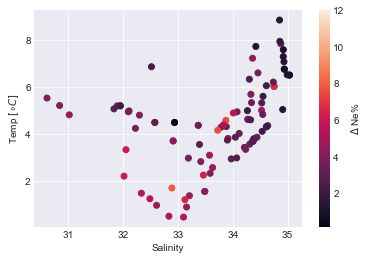

In [42]:
# plot TS and Ne
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(data.salinity, data.temperature, c = data.delNe)
plt.colorbar(label ='$\Delta$ Ne%')
plt.xlabel('Salinity')
plt.ylabel('Temp $[\circ C]$')

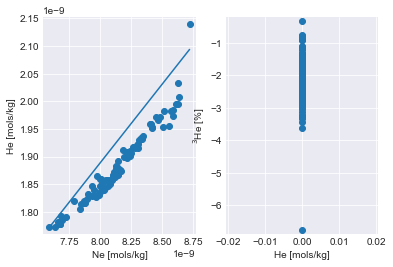

In [68]:
# plot the He/Ne and 3He/He ratios

ne_atm = np.array([ data.CNe.min(), data.CNe.max() ])
he_atm = ne_atm * 0.2857 + data.CHe.min()- 0.2857*ne_atm[0]


fig = plt.figure()
ax = fig.add_subplot(121)

plt.plot(ne_atm, he_atm)
plt.scatter(data.CNe, data.CHe)
# plt.xlim([ data.CNe.min(), data.CNe.max() ])
# plt.ylim([ data.CHe.min(), data.CHe.max() ])

plt.margins(.02)
plt.xlabel('Ne [mols/kg]')
plt.ylabel('He [mols/kg]')

ax = fig.add_subplot(122)
plt.scatter( data.CHe, data.Del3He,)
# plt.xlim([ data.CHe.min(), data.CHe.max() ])
plt.margins(.02)
plt.xlabel('He [mols/kg]')
plt.ylabel('$^3$He [%]')
